#   GRIP - The Sparks Foundation
##  Data Science and Business Analytics Intern
### Task 1: PREDICTION USING SUPERVISED ML
### Name: Pritish Kumar Rout
### Aim: To predict the percentage of a student based on the number of study hours.

#  Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

## Data Cleaning and Preparation

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

 So,we can see only two types of variable are there .

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see that there is no null value in the data so we do not need to do anything 

In [6]:
df.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking Outliers

We will use boxplot to check the presence of outliers.

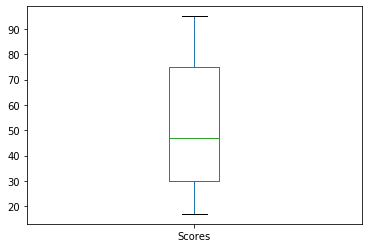

In [7]:
df['Scores'].plot.box()

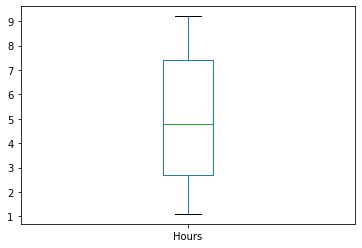

In [8]:
df['Hours'].plot.box()

From the above two diagram it is clear that there is no outliers present in the data.

## Data Analysis and Visualization

Now as we have prepared the data,let's analyse the data using graphs

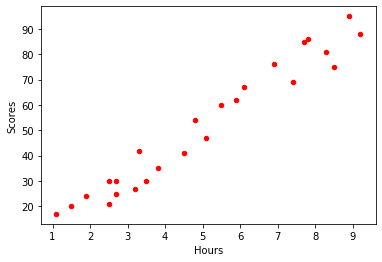

In [9]:
df.plot.scatter('Hours','Scores',color='r')

From the above graph it is clear that there is positive linear relationship between the two variables which can also be confirmed by finding the correlation between the two .

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Model Building

Here we will divide the data into train and test data and we will perform simple linear regression model for this problem 

In [11]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [12]:
x.shape

(25, 1)

In [13]:
y.shape

(25,)

In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(18, 1)
(18,)
(7, 1)
(7,)


## Training the Model

Here we will fit the data in the linear regression model.

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualization of the Model

The regression line has equation 𝑏₀ + 𝑏₁𝑥 where 𝑏₀ is intercept and 𝑏₁ is the slope

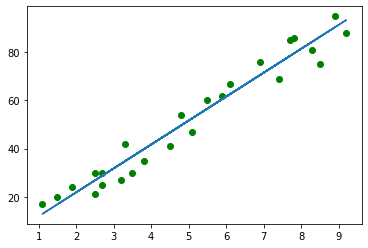

In [17]:
# Plotting the regression line
slope = lm.coef_
intercept = lm.intercept_

reg_line = intercept + slope*x 

# Plotting for the test data
plt.scatter(x,y,color='g')
plt.plot(x, reg_line)
plt.show()

## Prediction

So as we have trained and visualized our model,let's make the predictions

In [18]:
y_pred=lm.predict(test_x)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [19]:
test_y

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [20]:
data = pd.DataFrame({'Actual Score':np.array(test_y),'Predicted Score':y_pred})
data

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Now let's make the prediction of how much the student will score if he studies for 9.25 hours

In [21]:
time=9.25
own_pred=lm.predict([[time]])
own_pred

array([93.89272889])

So we can see that the student will score approx. 93.9 percent marks if he studies for 9.25 hours a day.

## Model Evaluation

We evaluate the model to test that whether we have build the model perfectly or not.

In [22]:
lm.score(test_x,test_y)

0.9367661043365054

In [23]:
lm.score(train_x,train_y)

0.9484509249326872

As we can see , the r^2 value of training and test data are almost equal, so we can say that our model is quite perfect. Let's find the mean squared error and mean absolute error also, less error means our model is well fitted.

In [24]:
from sklearn import metrics

In [25]:
metrics.mean_squared_error(test_y,y_pred)

20.33292367497997

In [26]:
metrics.mean_absolute_error(test_y,y_pred)

4.130879918502486

# Result : For studying 9.25 hours per day a student is likely to score 94 percentage of marks approx. 